In [25]:
import numpy as np
import scipy as sp
import scipy.linalg as la
import matplotlib.pyplot as plt
import random_sparse_mat_generator as r

In [28]:
data = [1.0, 1.0, 1.0, 3.0, 4.4]
col = [0, 2, 2, 1, 1]
row = [0, 0, 0, 1, 2]
A = sparse.coo_matrix((data, (row, col)), shape=(3,3))
print(A.todense())
print(A.data.dtype, A.data.shape)
print(A.col.dtype, A.col.shape)
print(A.row.dtype, A.row.shape)
print(A.nnz)
B = r.sprand(6, 6, 0.1)
print(B.format)
print(B.todense())

[[ 1.   0.   2. ]
 [ 0.   3.   0. ]
 [ 0.   4.4  0. ]]
float64 (5,)
int32 (5,)
int32 (5,)
5
csr
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.91881268  0.          0.16751778  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.1305133 ]]


In [18]:
print(A.format)
A = A.tocsr()
print(A.format)
print(A.data)
print(A.indices)
print(A.indptr)
print(A.todense())
print(A.nnz)
A.eliminate_zeros()
print(A.nnz)

coo
csr
[ 1.   2.   3.   4.4]
[0 2 1 1]
[0 2 3 4]
[[ 1.   0.   2. ]
 [ 0.   3.   0. ]
 [ 0.   4.4  0. ]]
4
4


Let's make a *random* sparse matrix

First we'll set the density so that
$$
density = \frac{nnz(A)}{n^2}
$$

In [4]:
n = 1000
density = 5.0 / n # 5 points per row
nnz = int(n*n*density)
print(nnz)

5000


Now make the entries:

In [5]:
row = np.random.random_integers(low=0, high=n-1, size=nnz)
col = np.random.random_integers(low=0, high=n-1, size=nnz)
data = np.ones(nnz, dtype=float)

A = sparse.coo_matrix((data, (row, col)), shape=(n, n))
print(A.dtype)

float64


C:\Users\Root\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 999 + 1) instead
  if __name__ == '__main__':
C:\Users\Root\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 999 + 1) instead
  from ipykernel import kernelapp as app


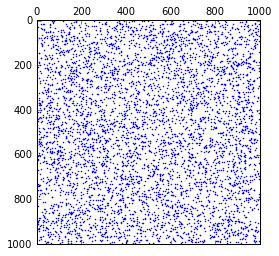

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.spy(A, marker='.', markersize=2)

In [7]:
print(A.shape, A.nnz)

(1000, 1000) 5000


But let's make it positive definite:

In [8]:
A.data[:] = -1.0                   # -1 for off-diagonals
rowsum = -np.array(A.sum(axis=1))  # positive rowsum
rowsum = rowsum.ravel()
A.setdiag(rowsum)

In [9]:
u = np.random.rand(n)
v = np.random.rand(n)

In [10]:
%timeit v = A * u

The slowest run took 10.79 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.7 µs per loop


In [14]:
B = A.toarray()

In [15]:
type(B)

numpy.ndarray

In [13]:
%timeit v = B.dot(u)

The slowest run took 25.23 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 118 µs per loop
